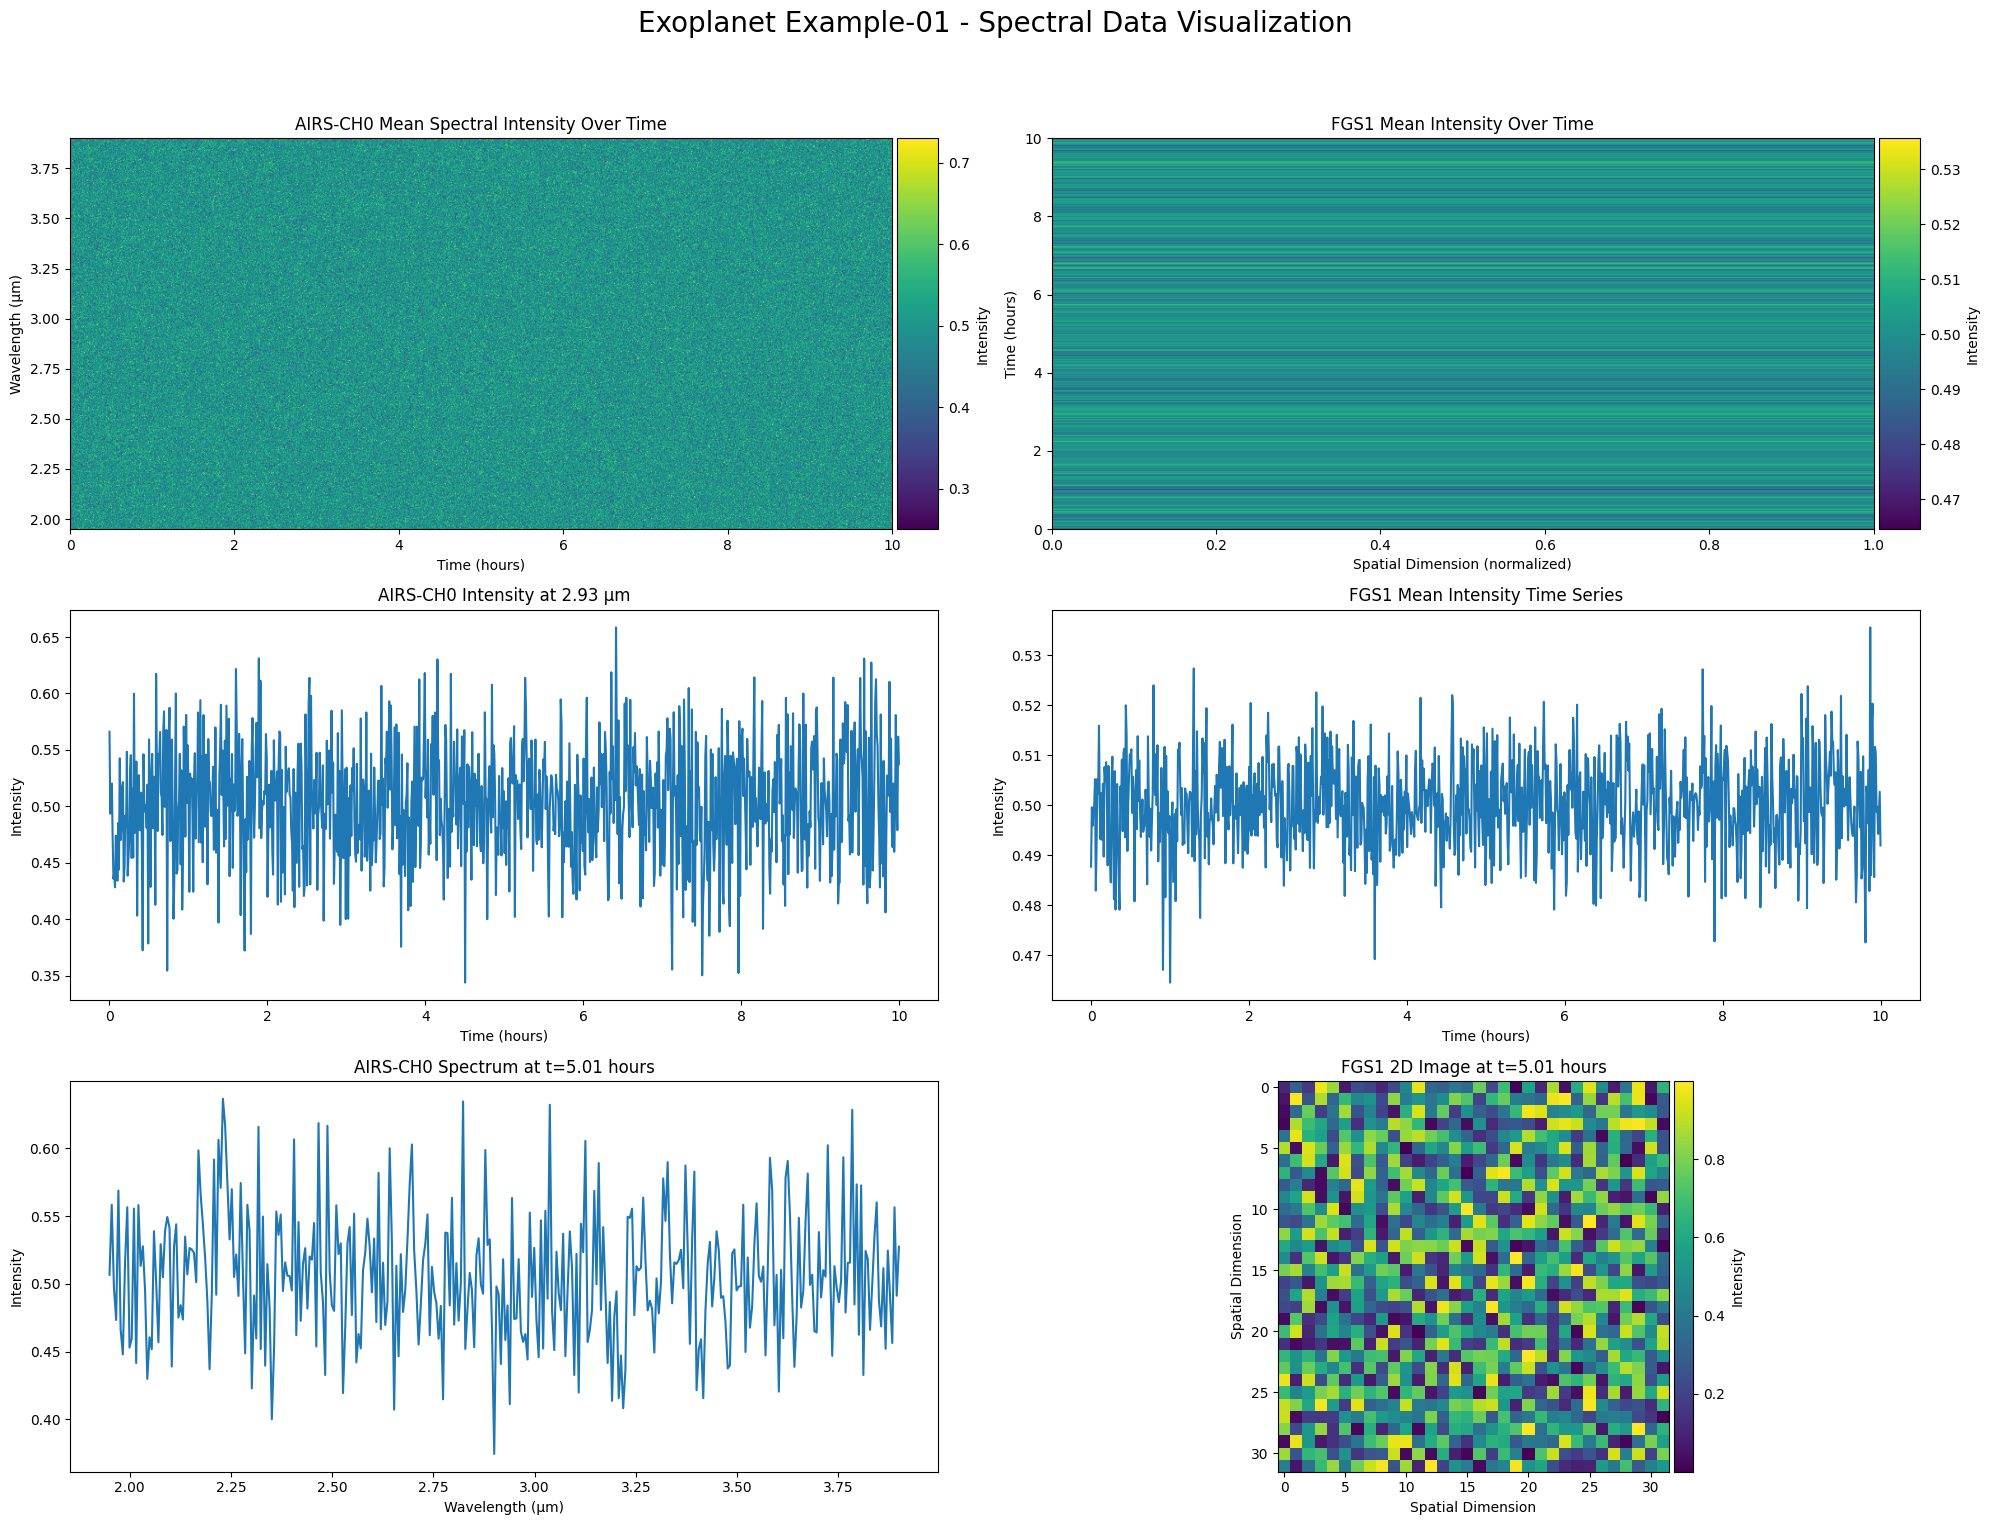

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def visualize_exoplanet_data(airs_data, fgs_data, airs_wavelengths, time_steps, planet_id):
    """
    Create a detailed visualization of exoplanet spectral data from AIRS-CH0 and FGS1 instruments.
    
    Parameters:
    - airs_data: numpy array of shape (n_times, 32, 356) for AIRS-CH0 data
    - fgs_data: numpy array of shape (n_times, 32, 32) for FGS1 data
    - airs_wavelengths: numpy array of wavelengths for AIRS-CH0
    - time_steps: numpy array of observation times
    - planet_id: string identifier for the exoplanet
    """
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle(f"Exoplanet {planet_id} - Spectral Data Visualization", fontsize=20)

    # 1. AIRS-CH0 Full Data Heatmap
    ax1 = fig.add_subplot(321)
    airs_mean = np.mean(airs_data, axis=1)
    im1 = ax1.imshow(airs_mean.T, aspect='auto', origin='lower', cmap='viridis',
                     extent=[time_steps[0], time_steps[-1], airs_wavelengths[0], airs_wavelengths[-1]])
    ax1.set_title("AIRS-CH0 Mean Spectral Intensity Over Time")
    ax1.set_xlabel("Time (hours)")
    ax1.set_ylabel("Wavelength (µm)")
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax, label="Intensity")

    # 2. FGS1 Full Data Heatmap
    ax2 = fig.add_subplot(322)
    fgs_mean = np.mean(fgs_data, axis=(1,2))
    im2 = ax2.imshow(fgs_mean.reshape(-1, 1), aspect='auto', origin='lower', cmap='viridis',
                     extent=[0, 1, time_steps[0], time_steps[-1]])
    ax2.set_title("FGS1 Mean Intensity Over Time")
    ax2.set_xlabel("Spatial Dimension (normalized)")
    ax2.set_ylabel("Time (hours)")
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax, label="Intensity")

    # 3. AIRS-CH0 Single Wavelength Time Series
    ax3 = fig.add_subplot(323)
    wavelength_idx = len(airs_wavelengths) // 2
    ax3.plot(time_steps, airs_mean[:, wavelength_idx])
    ax3.set_title(f"AIRS-CH0 Intensity at {airs_wavelengths[wavelength_idx]:.2f} µm")
    ax3.set_xlabel("Time (hours)")
    ax3.set_ylabel("Intensity")

    # 4. FGS1 Time Series
    ax4 = fig.add_subplot(324)
    ax4.plot(time_steps, fgs_mean)
    ax4.set_title("FGS1 Mean Intensity Time Series")
    ax4.set_xlabel("Time (hours)")
    ax4.set_ylabel("Intensity")

    # 5. AIRS-CH0 Spectrum at Specific Time
    ax5 = fig.add_subplot(325)
    time_idx = len(time_steps) // 2
    ax5.plot(airs_wavelengths, airs_mean[time_idx])
    ax5.set_title(f"AIRS-CH0 Spectrum at t={time_steps[time_idx]:.2f} hours")
    ax5.set_xlabel("Wavelength (µm)")
    ax5.set_ylabel("Intensity")

    # 6. FGS1 2D Image at Specific Time
    ax6 = fig.add_subplot(326)
    im6 = ax6.imshow(fgs_data[time_idx], cmap='viridis')
    ax6.set_title(f"FGS1 2D Image at t={time_steps[time_idx]:.2f} hours")
    ax6.set_xlabel("Spatial Dimension")
    ax6.set_ylabel("Spatial Dimension")
    divider = make_axes_locatable(ax6)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im6, cax=cax, label="Intensity")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage (you would need to replace these with actual data loading)
def load_example_data():
    # Simulated data for demonstration
    n_times = 1000
    airs_data = np.random.rand(n_times, 32, 356)
    fgs_data = np.random.rand(n_times, 32, 32)
    airs_wavelengths = np.linspace(1.95, 3.90, 356)
    time_steps = np.linspace(0, 10, n_times)  # 10 hours of observation
    return airs_data, fgs_data, airs_wavelengths, time_steps

airs_data, fgs_data, airs_wavelengths, time_steps = load_example_data()
visualize_exoplanet_data(airs_data, fgs_data, airs_wavelengths, time_steps, "Example-01")

In [1]:
import os
import pandas as pd
import pyarrow.parquet as pq

def import_parquet_files(directory):
    dataframes = []
    for filename in os.listdir(directory):
        if filename.endswith('.parquet'):
            filepath = os.path.join(directory, filename)
            df = pq.read_table(filepath).to_pandas()
            dataframes.append(df)
    return dataframes

dataframes = import_parquet_files('train/14485303')

ModuleNotFoundError: No module named 'pyarrow'

In [2]:
!pip install pyarrow datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 176.2 MB/s eta 0:00:0000:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0


In [5]:
df = pd.read_parquet(os.path.join('.',f'train/14485303/AIRS-CH0_signal.parquet'))

In [6]:
df

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_11382,column_11383,column_11384,column_11385,column_11386,column_11387,column_11388,column_11389,column_11390,column_11391
0,673,669,685,665,702,682,691,683,670,698,...,673,682,671,676,697,674,687,683,668,674
1,693,691,691,704,680,687,697,693,675,689,...,699,678,700,693,696,693,691,673,688,690
2,695,688,680,699,689,669,711,709,672,674,...,668,685,702,681,688,705,671,686,686,682
3,688,709,688,692,691,711,704,694,700,693,...,683,705,701,697,696,704,711,685,694,713
4,679,681,676,705,710,684,665,688,700,684,...,673,681,687,692,672,663,690,675,694,706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,671,683,679,699,701,694,697,677,709,679,...,700,675,673,708,686,687,705,704,706,693
11246,673,685,707,681,698,686,698,685,701,696,...,692,704,686,682,681,684,683,687,680,689
11247,684,686,699,675,687,710,680,701,671,687,...,701,710,687,707,688,692,689,681,695,693
11248,683,699,674,679,664,690,680,683,674,695,...,689,692,685,687,678,684,690,682,691,677


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

def load_and_preprocess_data(planet_id, data_type='train'):
    # Load signal data
    airs_signal = pd.read_parquet(f'{data_type}/{planet_id}/AIRS-CH0_signal.parquet')
    fgs_signal = pd.read_parquet(f'{data_type}/{planet_id}/FGS1_signal.parquet')
    
    # Load calibration data
    airs_dark = pd.read_parquet(f'{data_type}/{planet_id}/AIRS-CH0_calibration/dark.parquet')
    airs_flat = pd.read_parquet(f'{data_type}/{planet_id}/AIRS-CH0_calibration/flat.parquet')
    fgs_dark = pd.read_parquet(f'{data_type}/{planet_id}/FGS1_calibration/dark.parquet')
    fgs_flat = pd.read_parquet(f'{data_type}/{planet_id}/FGS1_calibration/flat.parquet')
    
    # Load ADC info
    adc_info = pd.read_csv(f'{data_type}_adc_info.csv')


ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
    airs_gain, airs_offset = adc_info.loc[adc_info['planet_id'] == planet_id, ['AIRS-CH0_adc_gain', 'AIRS-CH0_adc_offset']].values
    fgs_gain, fgs_offset = adc_info.loc[adc_info['planet_id'] == planet_id, ['FGS1_adc_gain', 'FGS1_adc_offset']].values
    
    # Apply ADC correction
    airs_signal = airs_signal * airs_gain + airs_offset
    fgs_signal = fgs_signal * fgs_gain + fgs_offset
    
    # Reshape signals
    airs_signal = airs_signal.values.reshape(-1, 32, 356)
    fgs_signal = fgs_signal.values.reshape(-1, 32, 32)
    
    # Apply dark and flat field corrections
    airs_signal = (airs_signal - airs_dark.values) / airs_flat.values
    fgs_signal = (fgs_signal - fgs_dark.values) / fgs_flat.values
    
    # Time domain detrending (example using Savitzky-Golay filter)
    for i in range(airs_signal.shape[1]):
        for j in range(airs_signal.shape[2]):
            airs_signal[:, i, j] = signal.savgol_filter(airs_signal[:, i, j], window_length=51, polyorder=3)
    
    for i in range(fgs_signal.shape[1]):
        for j in range(fgs_signal.shape[2]):
            fgs_signal[:, i, j] = signal.savgol_filter(fgs_signal[:, i, j], window_length=51, polyorder=3)
    
    # Normalize data
    scaler = StandardScaler()
    airs_signal = scaler.fit_transform(airs_signal.reshape(-1, 32*356)).reshape(-1, 32, 356)
    fgs_signal = scaler.fit_transform(fgs_signal.reshape(-1, 32*32)).reshape(-1, 32, 32)
    
    return airs_signal, fgs_signal

def visualize_data(airs_signal, fgs_signal):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    ax1.imshow(airs_signal[0], aspect='auto', cmap='viridis')
    ax1.set_title('AIRS-CH0 First Frame')
    ax1.set_xlabel('Wavelength')
    ax1.set_ylabel('Spatial dimension')
    
    ax2.imshow(fgs_signal[0], cmap='viridis')
    ax2.set_title('FGS1 First Frame')
    ax2.set_xlabel('Spatial dimension')
    ax2.set_ylabel('Spatial dimension')
    
    plt.tight_layout()
    plt.show()

# Example usage
planet_id = '14485303'
airs_signal, fgs_signal = load_and_preprocess_data(planet_id)
visualize_data(airs_signal, fgs_signal)

In [10]:
## we will start by getting the index of the training data:
def get_index(files,CHUNKS_SIZE ):
    index = []
    for file in files :
        file_name = file.split('/')[-1]
        if file_name.split('_')[0] == 'AIRS-CH0' and file_name.split('_')[1] == 'signal.parquet':
            file_index = os.path.basename(os.path.dirname(file))
            index.append(int(file_index))
    index = np.array(index)
    index = np.sort(index) 
    # credit to DennisSakva
    index=np.array_split(index, len(index)//CHUNKS_SIZE)
    
    return index

In [18]:
import glob

path_folder = './'
files = glob.glob(os.path.join(path_folder + 'train/', '*/*'))
CHUNKS_SIZE=1
index = get_index(files[:22],CHUNKS_SIZE)  ## 48 is hardcoded here but please feel free to remove it if you want to do it for the entire dataset

train_adc_info = pd.read_csv(os.path.join(path_folder, 'train_adc_info.csv'))
train_adc_info = train_adc_info.set_index('planet_id')
axis_info = pd.read_parquet(os.path.join(path_folder,'axis_info.parquet'))
DO_MASK = True
DO_THE_NL_CORR = False
DO_DARK = True
DO_FLAT = True
TIME_BINNING = True
cut_inf, cut_sup = 39, 321
l = cut_sup - cut_inf

for n, index_chunk in enumerate(tqdm(index)):
    AIRS_CH0_clean = np.zeros((CHUNKS_SIZE, 11250, 32, l))
    FGS1_clean = np.zeros((CHUNKS_SIZE, 135000, 32, 32))
    
    for i in range (CHUNKS_SIZE) : 
        df = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/AIRS-CH0_signal.parquet'))
        signal = df.values.astype(np.float64).reshape((df.shape[0], 32, 356))
        gain = train_adc_info['AIRS-CH0_adc_gain'].loc[index_chunk[i]]
        offset = train_adc_info['AIRS-CH0_adc_offset'].loc[index_chunk[i]]
        signal = ADC_convert(signal, gain, offset)
        dt_airs = axis_info['AIRS-CH0-integration_time'].dropna().values
        dt_airs[1::2] += 0.1
        chopped_signal = signal[:, :, cut_inf:cut_sup]
        del signal, df
        
        # CLEANING THE DATA: AIRS
        flat = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/AIRS-CH0_calibration/flat.parquet')).values.astype(np.float64).reshape((32, 356))[:, cut_inf:cut_sup]
        dark = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/AIRS-CH0_calibration/dark.parquet')).values.astype(np.float64).reshape((32, 356))[:, cut_inf:cut_sup]
        dead_airs = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/AIRS-CH0_calibration/dead.parquet')).values.astype(np.float64).reshape((32, 356))[:, cut_inf:cut_sup]
        linear_corr = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/AIRS-CH0_calibration/linear_corr.parquet')).values.astype(np.float64).reshape((6, 32, 356))[:, :, cut_inf:cut_sup]
        
        if DO_MASK:
            chopped_signal = mask_hot_dead(chopped_signal, dead_airs, dark)
            AIRS_CH0_clean[i] = chopped_signal
        else:
            AIRS_CH0_clean[i] = chopped_signal
            
        if DO_THE_NL_CORR: 
            linear_corr_signal = apply_linear_corr(linear_corr,AIRS_CH0_clean[i])
            AIRS_CH0_clean[i,:, :, :] = linear_corr_signal
        del linear_corr
        
        if DO_DARK: 
            cleaned_signal = clean_dark(AIRS_CH0_clean[i], dead_airs, dark, dt_airs)
            AIRS_CH0_clean[i] = cleaned_signal
        else: 
            pass
        del dark
        
        df = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/FGS1_signal.parquet'))
        fgs_signal = df.values.astype(np.float64).reshape((df.shape[0], 32, 32))
        
        FGS1_gain = train_adc_info['FGS1_adc_gain'].loc[index_chunk[i]]
        FGS1_offset = train_adc_info['FGS1_adc_offset'].loc[index_chunk[i]]
        
        fgs_signal = ADC_convert(fgs_signal, FGS1_gain, FGS1_offset)
        dt_fgs1 = np.ones(len(fgs_signal))*0.1
        dt_fgs1[1::2] += 0.1
        chopped_FGS1 = fgs_signal
        del fgs_signal, df
        
        # CLEANING THE DATA: FGS1
        flat = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/FGS1_calibration/flat.parquet')).values.astype(np.float64).reshape((32, 32))
        dark = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/FGS1_calibration/dark.parquet')).values.astype(np.float64).reshape((32, 32))
        dead_fgs1 = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/FGS1_calibration/dead.parquet')).values.astype(np.float64).reshape((32, 32))
        linear_corr = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/FGS1_calibration/linear_corr.parquet')).values.astype(np.float64).reshape((6, 32, 32))
        
        if DO_MASK:
            chopped_FGS1 = mask_hot_dead(chopped_FGS1, dead_fgs1, dark)
            FGS1_clean[i] = chopped_FGS1
        else:
            FGS1_clean[i] = chopped_FGS1

        if DO_THE_NL_CORR: 
            linear_corr_signal = apply_linear_corr(linear_corr,FGS1_clean[i])
            FGS1_clean[i,:, :, :] = linear_corr_signal
        del linear_corr
        
        if DO_DARK: 
            cleaned_signal = clean_dark(FGS1_clean[i], dead_fgs1, dark,dt_fgs1)
            FGS1_clean[i] = cleaned_signal
        else: 
            pass
        del dark
        
    # SAVE DATA AND FREE SPACE
    AIRS_cds = get_cds(AIRS_CH0_clean)
    FGS1_cds = get_cds(FGS1_clean)
    
    del AIRS_CH0_clean, FGS1_clean
    
    ## (Optional) Time Binning to reduce space
    if TIME_BINNING:
        AIRS_cds_binned = bin_obs(AIRS_cds,binning=30)
        FGS1_cds_binned = bin_obs(FGS1_cds,binning=30*12)
    else:
        AIRS_cds = AIRS_cds.transpose(0,1,3,2) ## this is important to make it consistent for flat fielding, but you can always change it
        AIRS_cds_binned = AIRS_cds
        FGS1_cds = FGS1_cds.transpose(0,1,3,2)
        FGS1_cds_binned = FGS1_cds
    
    del AIRS_cds, FGS1_cds
    
    for i in range (CHUNKS_SIZE):
        flat_airs = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/AIRS-CH0_calibration/flat.parquet')).values.astype(np.float64).reshape((32, 356))[:, cut_inf:cut_sup]
        flat_fgs = pd.read_parquet(os.path.join(path_folder,f'train/{index_chunk[i]}/FGS1_calibration/flat.parquet')).values.astype(np.float64).reshape((32, 32))
        if DO_FLAT:
            corrected_AIRS_cds_binned = correct_flat_field(flat_airs,dead_airs, AIRS_cds_binned[i])
            AIRS_cds_binned[i] = corrected_AIRS_cds_binned
            corrected_FGS1_cds_binned = correct_flat_field(flat_fgs,dead_fgs1, FGS1_cds_binned[i])
            FGS1_cds_binned[i] = corrected_FGS1_cds_binned
        else:
            pass

    ## save data
    np.save(os.path.join(path_out, 'AIRS_clean_train_{}.npy'.format(n)), AIRS_cds_binned)
    np.save(os.path.join(path_out, 'FGS1_train_{}.npy'.format(n)), FGS1_cds_binned)
    del AIRS_cds_binned
    del FGS1_cds_binned


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:01<?, ?it/s]


NameError: name 'ADC_convert' is not defined